In [1]:
import os
import sys
import glob
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np

from   mpl_toolkits.axes_grid1 import make_axes_locatable
from   astropy.table           import Table

In [2]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [3]:
from   gama_limits import gama_field
from   delta8_limits import delta8_tier

In [4]:
field = 'G9'

In [5]:
# Parameters
field = "G15"


In [6]:
gama_d8 = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_ddp_n8.fits')
gama_d8

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN,DDP [3],RANDSEP,RANDMATCH,BOUND_DIST,FILLFACTOR,DDP1_N8,DDP2_N8,DDP3_N8,DDP1_DELTA8,DDP2_DELTA8,DDP3_DELTA8
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,mag,,,mag,,,,,,,,,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,int64,float64,int64,float64,float64,int64,int64,int64,float64,float64,float64
209748,587725074990104938,134.80169161,0.00541943,17.670448,0.16614,5,528071002781935616,6,20.69154,18.777487,17.623806,17.12555,16.7443,561.963526479418,38.74854064579229,G9,336.6895087963473,-344.77276732721725,-0.29201119712561685,1.1536808,0.9656032703681418,0,6,-0.012802438816760256,0.17527509220669957,0.21718717039995156,0.5670456235874188,0.8038223482041342,0.8,-0.1611558,-0.13291201,-21.134123707977864,-21.162367503015133,38.80457201120052,38.83281580623779,2.129551,0.3654359406240779,0.0,-5.6704483,0.014117166402440595,0.0,1 .. 0,307.76168580572744,1170191,0.0,0.4867903142224768,13,36,0,1.3130009079623144,2.473270943092479,-1.0
537129,588848898840789129,184.21539209,-1.03669489,16.961576,0.07156,5,324336722294892544,6,19.626896,17.806122,16.912678,16.516546,16.241358,226.73735426434604,36.777615373338456,G12,211.10784811178928,13.778240299502608,-4.0400222378383175,0.89344406,0.9590927322944667,0,6,-0.14128247488344584,-0.20693114589861566,0.08799718779518459,0.1837785822606589,0.7976626668138226,0.8,-0.06941321,-0.057248004,-19.83462289187028,-19.846788095560807,36.79619935366227,36.808364557352796,2.8384228,0.22859104799958965,0.0,-4.9615765,0.00775015660264215,0.0,0 .. 0,1.1942273379724142,817350,5.33944888858101,0.8859210699451207,26,48,83,1.5418662609606906,1.5446279751498584,1.3746341106786835
382081,587727944027472289,135.23306993,1.95568309,19.110462,0.22654,4,G09_Y2_021_035,6,21.606937,20.09877,19.122538,18.54879,18.2157,795.6858082015166,39.50370806041515,G9,456.48158760084635,-460.4315484359427,21.680969625684444,0.9762325,0.6972784121110702,0,5,-0.0013580076341729863,0.2775961089412802,0.2218401822645188,0.5776936646998119,0.6203790462512304,2.12,-0.2197438,-0.48026478,-20.395342250815464,-20.134821271053386,39.50580443953617,39.24528345977409,0.68953705,0.3112293363187196,0.0,-7.110462,0.008875135483098399,0.0,1 .. 0,410.29820335272547,920701,0.0,0.35996371894612267,9,0,0,1.165499853648257,-1.0,-1.0
561801,588848899377922344,184.87290284,-0.54973036,19.31083,0.23925,4,G12_Y3_013_281,6,21.496574,20.378784,19.279503,18.788294,18.447803,846.7071391866866,39.63866610815502,G12,681.1973144334473,52.315729708895546,-7.238360697540164,1.0992813,0.7660327047680001,0,5,0.03335448706113034,0.3666030933282865,0.26124136733428505,0.6921762951172632,0.6683463832521781,0.8,-0.23207252,-0.1914,-20.35700579561584,-20.39767830647819,39.6678349582135,39.70850746907585,0.48917007,0.2894669815220143,0.0,-7.310829,0.009954037561673866,0.0,1 .. 0,0.782359751539647,1597087,18.16278664516453,1.0341962805990934,30,0,0,1.5124224331476621,-1.0,-1.0
227206,587726014009442667,212.57882544,1.21256973,19.320875,0.25749,4,G15_Y3_017_043,6,22.189722,20.593586,19.20445,18.61652,18.272427,921.0087985140573,39.82131889543513,G15,620.3405500570348,389.0924449752832,14.877260726360266,1.3891354,0.9286639809620368,0,6,0.10993538643000941,0.5704067661857459,0.3364772018215463,0.9552430704775848,0.7703

In [7]:
np.unique(gama_d8['FIELD'].data)

array([b'G12', b'G15', b'G9'], dtype='|S4')

In [8]:
gama_d8 = gama_d8[gama_d8['FIELD'] == field]

In [9]:
# gama_d8 = gama_d8[gama_d8['FILLFACTOR'] > 0.8]

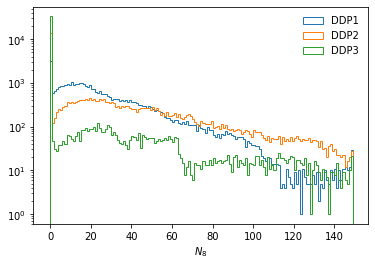

In [10]:
bins=np.arange(-1., 150., 1.)

_ = pl.hist(gama_d8['DDP1_N8'], histtype='step', bins=bins, label='DDP1')
_ = pl.hist(gama_d8['DDP2_N8'], histtype='step', bins=bins, label='DDP2')
_ = pl.hist(gama_d8['DDP3_N8'], histtype='step', bins=bins, label='DDP3')

pl.xlabel(r'$N_8$')
pl.yscale('log')
pl.legend(frameon=False)

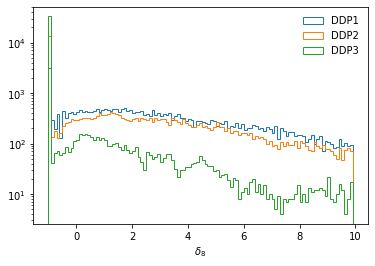

In [11]:
bins=np.arange(-1., 10., 0.1)

_ = pl.hist(gama_d8['DDP1_DELTA8'], histtype='step', bins=bins, label='DDP1')
_ = pl.hist(gama_d8['DDP2_DELTA8'], histtype='step', bins=bins, label='DDP2')
_ = pl.hist(gama_d8['DDP3_DELTA8'], histtype='step', bins=bins, label='DDP3')

pl.xlabel(r'$\delta_8$')
pl.yscale('log')
pl.legend(frameon=False)

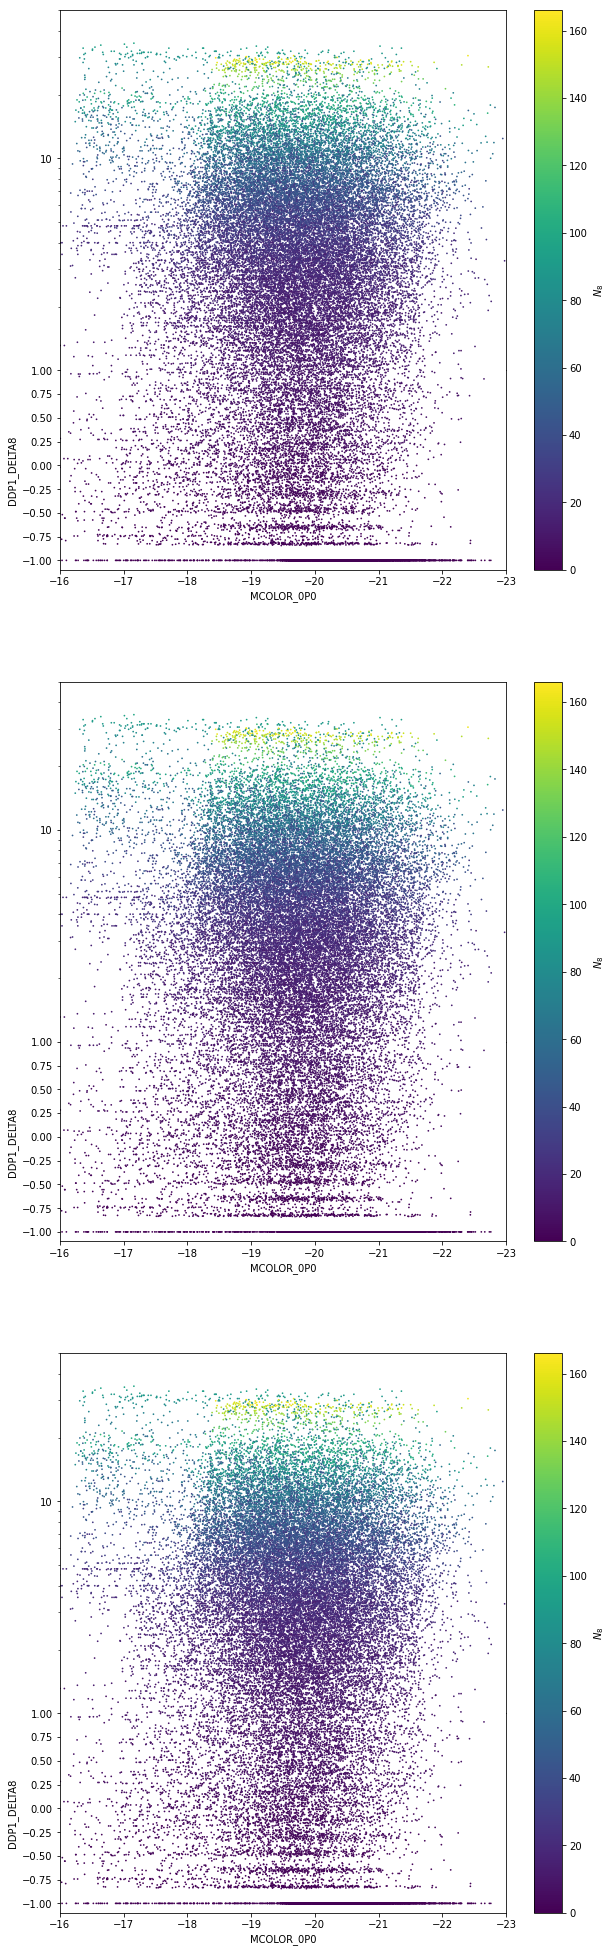

In [12]:
fig, axes = plt.subplots(3, 1, figsize=(10, 35))

for idx, ax in enumerate(axes):
    sc = ax.scatter(gama_d8['MCOLOR_0P0'], gama_d8['DDP1_DELTA8'], c=gama_d8['DDP1_N8'], marker='.', lw=0.0, s=12)

    ax.set_xlabel('MCOLOR_0P0')
    ax.set_ylabel('DDP1_DELTA8')

    ax.set_xlim(-23., -16.)
    ax.set_ylim(-1.1, 1.)
    
    ax.spines['top'].set_visible(False)
    
    divider = make_axes_locatable(ax)
    
    axLog = divider.append_axes("top", size=5.0, pad=0, sharex=ax)
    axLog.set_yscale('log')
    axLog.set_xlim((-16., -23.))
    axLog.set_ylim((1., 50.))
    axLog.scatter(gama_d8['MCOLOR_0P0'], gama_d8['DDP1_DELTA8'], c=gama_d8['DDP1_N8'], marker='.', lw=0.0, s=12)

    axLog.spines['bottom'].set_visible(False)
    axLog.xaxis.set_ticks_position('top')
    axLog.xaxis.set_visible(False)

    axLog.set_yticks([10.])
    axLog.set_yticklabels(['10'])
    
    ax.set_title('DDP{}'.format(idx+1))

    colorbar = fig.colorbar(sc, ax=ax, label=r'$N_8$')

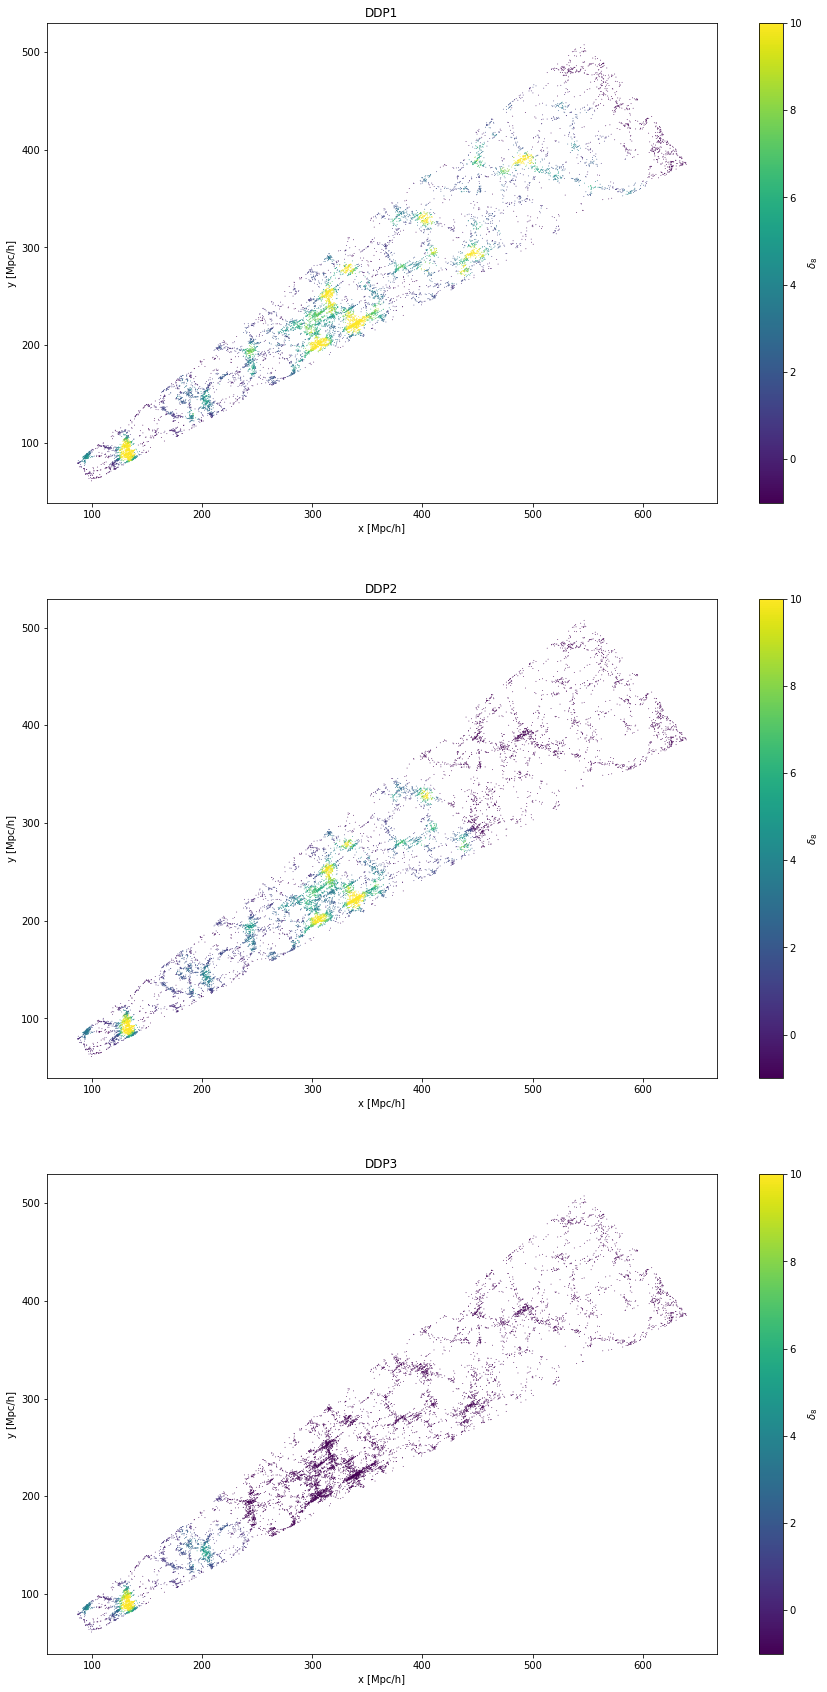

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(15, 30))

gama_d8_slice = gama_d8[np.abs(gama_d8['CARTESIAN_Z']) < 5.]

for idx in range(3):
    sc = axes[idx].scatter(gama_d8_slice['CARTESIAN_X'],\
                           gama_d8_slice['CARTESIAN_Y'],\
                           c=gama_d8_slice['DDP{}_DELTA8'.format(idx+1)],\
                           marker='.',\
                           lw=0.0,\
                           s=3,\
                           vmin=-1.,\
                           vmax=10.)
    
    # axes[idx].set_ylim(100., -100.)
    
    colorbar = fig.colorbar(sc, ax=axes[idx], label=r'$\delta_8$')    
    
    axes[idx].set_xlabel('x [Mpc/h]')
    axes[idx].set_ylabel('y [Mpc/h]')
    
    axes[idx].set_title('DDP{}'.format(idx+1))

In [14]:
tiers = delta8_tier(gama_d8['DDP1_DELTA8'])

In [15]:
np.unique(tiers, return_counts=True)

(array([-99,   0,   1,   2,   3]), array([13454,  3591,  1518,  4185, 15951]))

# Done.